In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import colors
from sympy import sieve, prime
import itertools
import pandas as pd

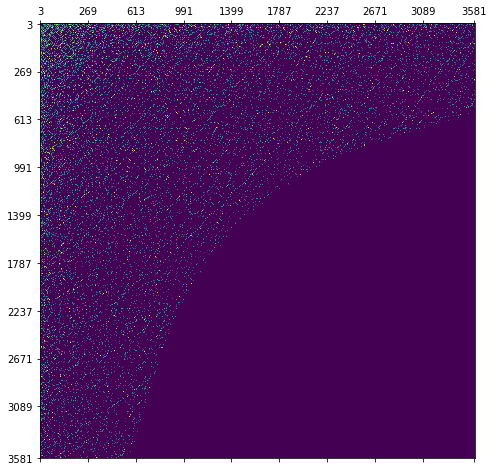

In [2]:
matrix_size = 500
matrix = np.zeros((matrix_size, matrix_size))

with open('C:/Users/esultano/git/elliptic_curves/data/elliptic_curves.csv') as f:
    for line in f.readlines():
        line = line.strip()
        p, q, cases = eval(line)
        idx_p = sieve.search(p)[0]-2
        idx_q = sieve.search(q)[0]-2
        if idx_p < matrix_size and idx_q < matrix_size:
            cases_set = set()
            for case in cases:
                cases_set.add(case[0])
            cases_list = list(cases_set)
            val = sum(i*i for i in cases_list)
            matrix[idx_p,idx_q] = val
            matrix[idx_q,idx_p] = val

max_prime = prime(matrix_size+2)
axis_labels = list(enumerate(sieve.primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
matrix_plot = ax.matshow(matrix, interpolation='nearest')
#fig.colorbar(matrix_plot)
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels)
plt.show()

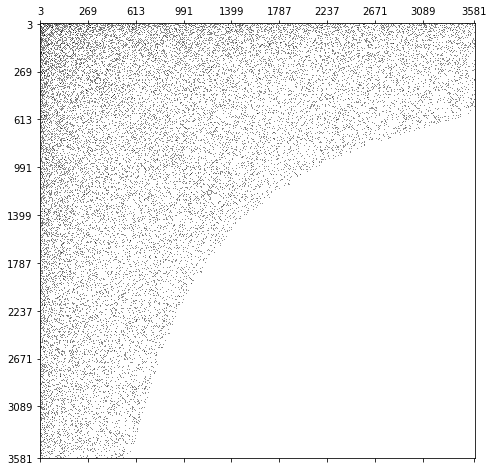

In [3]:
matrix_size = 500
matrix = np.zeros((matrix_size, matrix_size), dtype = np.float64)

with open('C:/Users/esultano/git/elliptic_curves/data/elliptic_curves.csv') as f:
    max_possible_cnt = 23
    max_actual_cnt = 0

    for line in f.readlines():
        line = line.strip()
        p, q, cases = eval(line)
        idx_p = sieve.search(p)[0]-2
        idx_q = sieve.search(q)[0]-2
        if idx_p < matrix_size and idx_q < matrix_size:
            def Transform(x):
                # https://www.wolframalpha.com/input?i=plot+-%281+-+x%29%5E3+%2B+1+for+x+from+0+to+1
                return -((1.0 - x) ** 3) + 1.0
            def GetGrey():
                global max_actual_cnt, max_possible_cnt
                cnt = len(cases)
                assert 1 <= cnt <= max_possible_cnt
                max_actual_cnt = max(max_actual_cnt, cnt)
                return 0.4 + 0.6 * Transform((cnt - 0.5) / max_possible_cnt)
            matrix[idx_p,idx_q] = GetGrey()
            matrix[idx_q,idx_p] = matrix[idx_p,idx_q]

assert max_actual_cnt == max_possible_cnt, (max_actual_cnt, max_possible_cnt)

max_prime = prime(matrix_size+2)
axis_labels = list(enumerate(sieve.primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

base_colors = [(1, 1, 1)]
matrix_cell_colors = []
for i, c in enumerate(base_colors):
    block = 64
    for j in range(block):
        k = 1 - j / (block - 1)
        matrix_cell_colors.append((c[0] * k, c[1] * k, c[2] * k))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
matrix_plot = ax.matshow(matrix, interpolation='nearest',
    cmap = colors.LinearSegmentedColormap.from_list('my_cmap', matrix_cell_colors))
#fig.colorbar(matrix_plot)
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels)
plt.show()

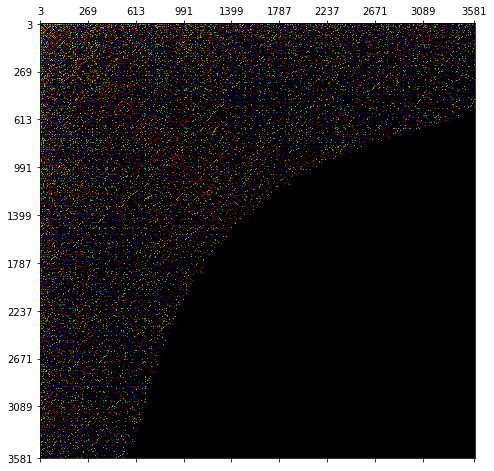

In [4]:
matrix_size = 500
matrix = np.zeros((matrix_size, matrix_size), dtype = np.float64)

with open('C:/Users/esultano/git/elliptic_curves/data/elliptic_curves.csv') as f:
    max_possible_cnt = 7
    max_actual_cnt = 0

    for line in f.readlines():
        line = line.strip()
        p, q, cases = eval(line)
        idx_p = sieve.search(p)[0]-2
        idx_q = sieve.search(q)[0]-2
        if idx_p < matrix_size and idx_q < matrix_size:
            def Transform(x):
                # https://www.wolframalpha.com/input?i=plot+-%281+-+x%29%5E3+%2B+1+for+x+from+0+to+1
                return -((1.0 - x) ** 3) + 1.0
            def GetColored():
                global max_actual_cnt, max_possible_cnt
                cases_map = {}
                for case in cases:
                    cases_map[case[0]] = cases_map.get(case[0], 0) + 1
                max_case, max_case_cnt = sorted(cases_map.items(), key = lambda e: (-e[1], e[0]))[0]
                assert 1 <= max_case <= 4, (cases, cases_map, max_case)
                max_actual_cnt = max(max_actual_cnt, max_case_cnt)
                assert 1 <= max_case_cnt <= max_possible_cnt, (max_case_cnt, max_possible_cnt)
                return 1.0 / 5 * (max_case + 0.5 + 0.5 * Transform((max_case_cnt - 0.5) / max_possible_cnt))
            matrix[idx_p,idx_q] = GetColored()
            matrix[idx_q,idx_p] = matrix[idx_p,idx_q]

assert max_actual_cnt == max_possible_cnt, (max_actual_cnt, max_possible_cnt)

max_prime = prime(matrix_size+2)
axis_labels = list(enumerate(sieve.primerange(3, max_prime)))
axis_labels = axis_labels[::len(axis_labels) // 9][:-1] + [axis_labels[-1]]
ticks = [e[0] for e in axis_labels]
ticklabels = [e[1] for e in axis_labels]

base_colors = [(0, 0, 0), (1, 0, 0), (0, 1, 0), (0, 0, 1), (1, 1, 0)]
matrix_cell_colors = []
for i, c in enumerate(base_colors):
    block = 64
    for j in range(block):
        k = j / (block - 1)
        matrix_cell_colors.append((c[0] * k, c[1] * k, c[2] * k))

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
matrix_plot = ax.matshow(matrix, interpolation='nearest',
    cmap = colors.LinearSegmentedColormap.from_list('my_cmap', matrix_cell_colors))
#fig.colorbar(matrix_plot)
ax.set_xticks(ticks); ax.set_xticklabels(ticklabels)
ax.set_yticks(ticks); ax.set_yticklabels(ticklabels)
plt.show()